In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_file_path = 'jobs_in_data.csv'

In [3]:
# DataFrame from the CSV file
df = pd.read_csv(csv_file_path)

In [4]:
# Display the DataFrame
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Clean Dataframe by dropping unnecessary columns ('salary_currency' and 'salary')
clean_df = df.drop(columns=['salary_currency', 'salary'])
clean_df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [6]:
# Clean column names
clean_df = clean_df.rename(columns={'work_year':'Work Year', 'job_title':'Job Title',\
                                    'job_category':'Job Category', 'salary_in_usd':'Salary in USD',\
                                    'employee_residence':'Employee Residence',\
                                    'experience_level':'Experience Level', 'employment_type':'Employment Type',\
                                    'work_setting':'Work Setting', 'company_location':'Company Location',\
                                    'company_size':'Company Size'})
clean_df.head()

,Work Year,Job Title,Job Category,Salary in USD,Employee Residence,Experience Level,Employment Type,Work Setting,Company Location,Company Size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [7]:
# Reorder columns
clean_df = clean_df[['Work Year', 'Job Category', 'Job Title', 'Experience Level', 'Employment Type',\
                     'Salary in USD', 'Work Setting', 'Company Location', 'Employee Residence', 'Company Size']]
clean_df.head()

,Work Year,Job Category,Job Title,Experience Level,Employment Type,Salary in USD,Work Setting,Company Location,Employee Residence,Company Size
0,2023,Data Engineering,Data DevOps Engineer,Mid-level,Full-time,95012,Hybrid,Germany,Germany,L
1,2023,Data Architecture and Modeling,Data Architect,Senior,Full-time,186000,In-person,United States,United States,M
2,2023,Data Architecture and Modeling,Data Architect,Senior,Full-time,81800,In-person,United States,United States,M
3,2023,Data Science and Research,Data Scientist,Senior,Full-time,212000,In-person,United States,United States,M
4,2023,Data Science and Research,Data Scientist,Senior,Full-time,93300,In-person,United States,United States,M


In [8]:
clean_df.to_csv('Jobs in Data.csv', index=False)

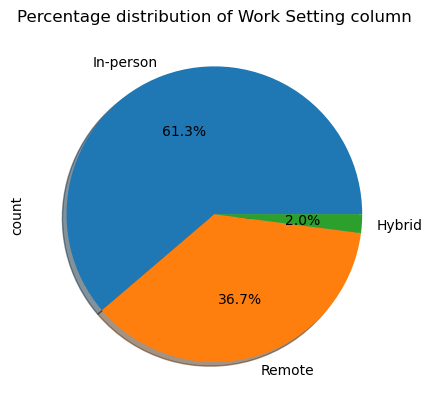

In [9]:
counts = clean_df['Work Setting'].value_counts()
counts.plot.pie(autopct='%1.1f%%', shadow=True)

plt.title('Percentage distribution of Work Setting column')

plt.show()

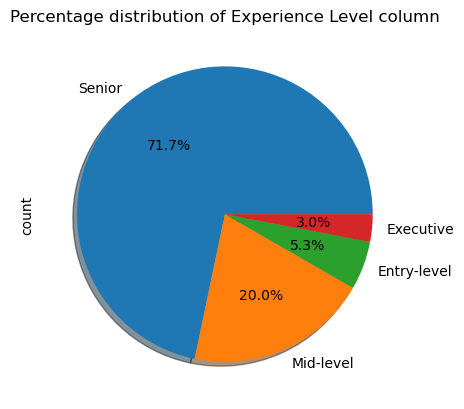

In [10]:
counts = clean_df['Experience Level'].value_counts()
counts.plot.pie(autopct='%1.1f%%', shadow=True)

plt.title('Percentage distribution of Experience Level column')

plt.show()

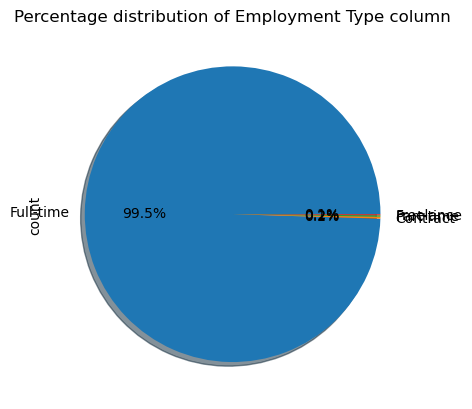

In [11]:
counts = clean_df['Employment Type'].value_counts()
counts.plot.pie(autopct='%1.1f%%', shadow=True)

plt.title('Percentage distribution of Employment Type column')

plt.show()

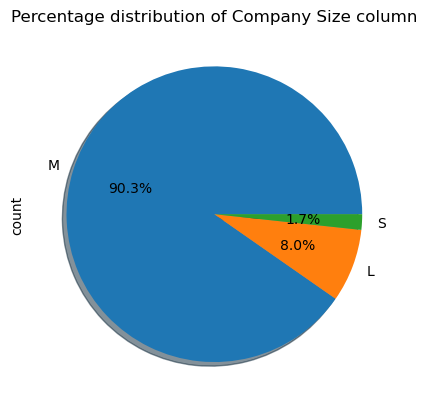

In [12]:
counts = clean_df['Company Size'].value_counts()
counts.plot.pie(autopct='%1.1f%%', shadow=True)

plt.title('Percentage distribution of Company Size column')

plt.show()

How does work experience compare to employment-type?

In [18]:
import pandas as pd

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Count the occurrences of each combination of experience level and employment type
count_df = clean_df.groupby(['Experience Level', 'Employment Type']).size().reset_index(name='Count')

# Print DataFrame
print(count_df)


   Experience Level Employment Type  Count
0       Entry-level        Contract      4
1       Entry-level       Freelance      2
2       Entry-level       Full-time    478
3       Entry-level       Part-time     12
4         Executive        Contract      1
5         Executive       Full-time    280
6         Mid-level        Contract     10
7         Mid-level       Freelance      5
8         Mid-level       Full-time   1851
9         Mid-level       Part-time      3
10           Senior        Contract      4
11           Senior       Freelance      4
12           Senior       Full-time   6701


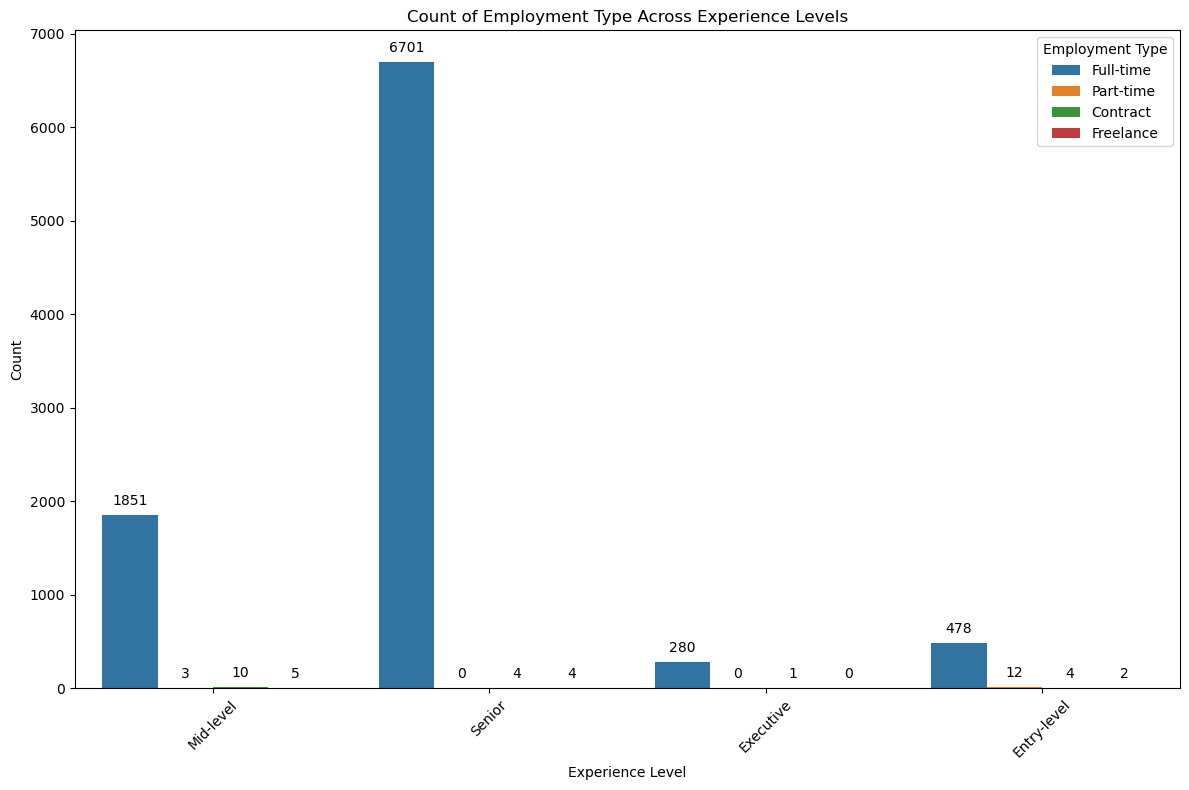

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Create a count plot to compare experience and employment type
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=clean_df, x='Experience Level', hue='Employment Type')
plt.title('Count of Employment Type Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()





Entry-level Positions

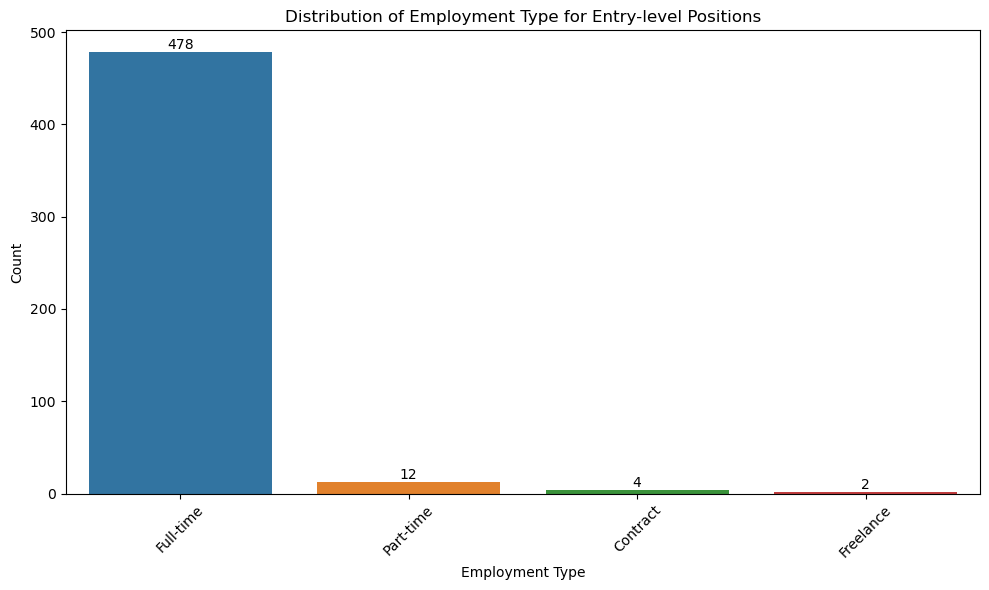

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Entry-level experience
entry_level_df = clean_df[clean_df['Experience Level'] == 'Entry-level']

# Count the occurrences of each employment type
employment_type_counts = entry_level_df['Employment Type'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values)
plt.title('Distribution of Employment Type for Entry-level Positions')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Annotate each bar with its corresponding value
for index, value in enumerate(employment_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Mid-level Positions

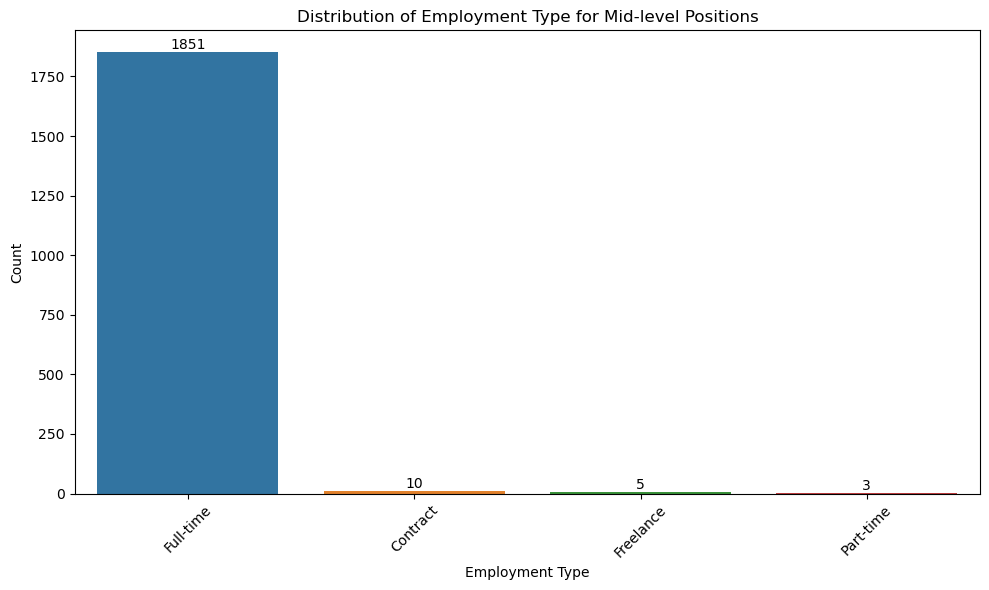

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Mid-level experience
mid_level_df = clean_df[clean_df['Experience Level'] == 'Mid-level']

# Count the occurrences of each employment type
employment_type_counts = mid_level_df['Employment Type'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values)
plt.title('Distribution of Employment Type for Mid-level Positions')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Annotate each bar with its corresponding value
for index, value in enumerate(employment_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Senior Positions 

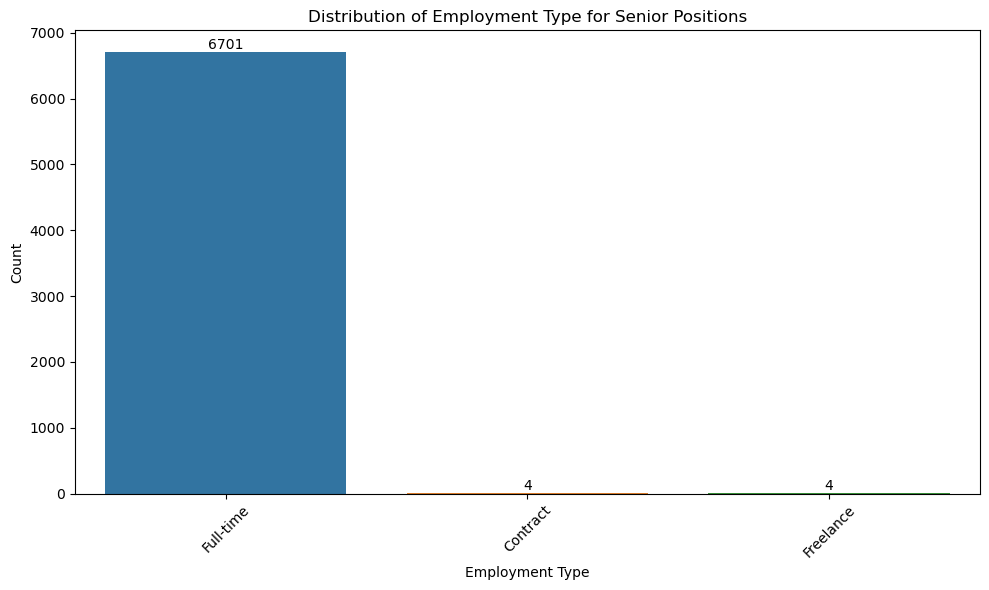

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Senior-level experience
senior_level_df = clean_df[clean_df['Experience Level'] == 'Senior']

# Count the occurrences of each employment type
employment_type_counts = senior_level_df['Employment Type'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values)
plt.title('Distribution of Employment Type for Senior Positions')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Annotate each bar with its corresponding value
for index, value in enumerate(employment_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Executive Positions

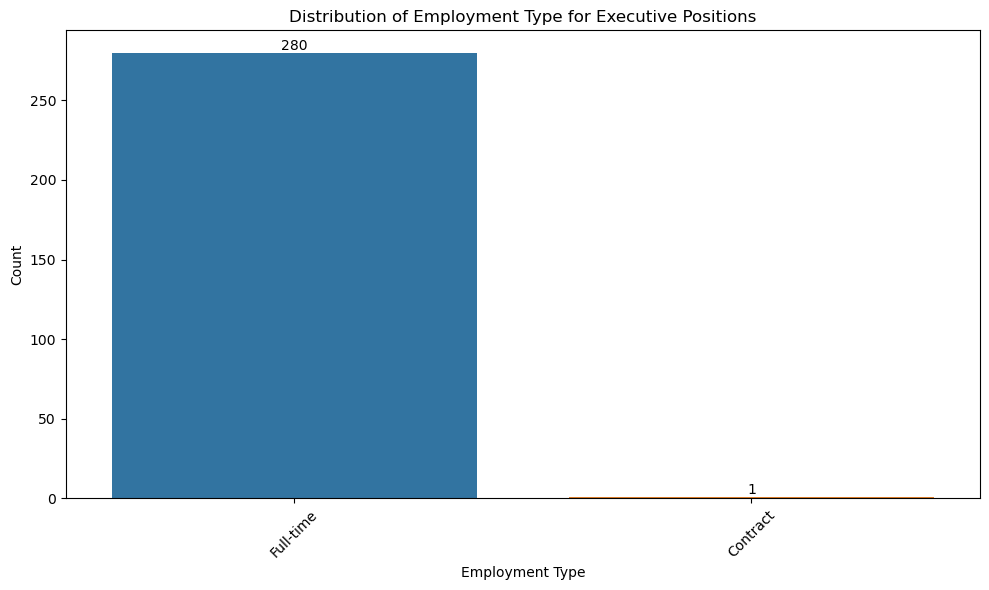

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Executive-level experience
executive_level_df = clean_df[clean_df['Experience Level'] == 'Executive']

# Count the occurrences of each employment type
employment_type_counts = executive_level_df['Employment Type'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values)
plt.title('Distribution of Employment Type for Executive Positions')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Annotate each bar with its corresponding value
for index, value in enumerate(employment_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


How does work type compare to company size?

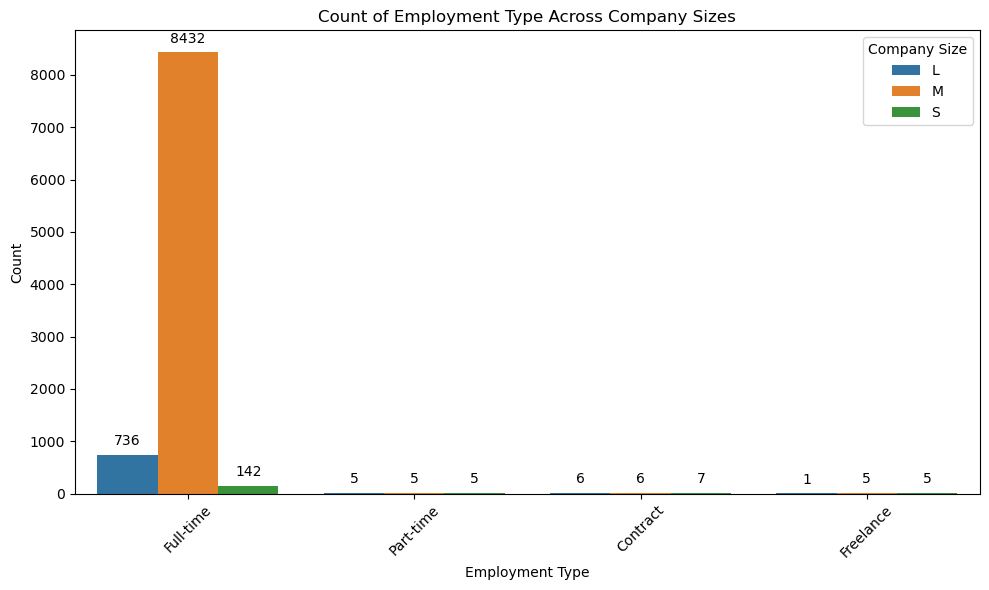

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Create a count plot to compare Employment Type and Company Size
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=clean_df, x='Employment Type', hue='Company Size')
plt.title('Count of Employment Type Across Company Sizes')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Company Size')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


Full-time Positions

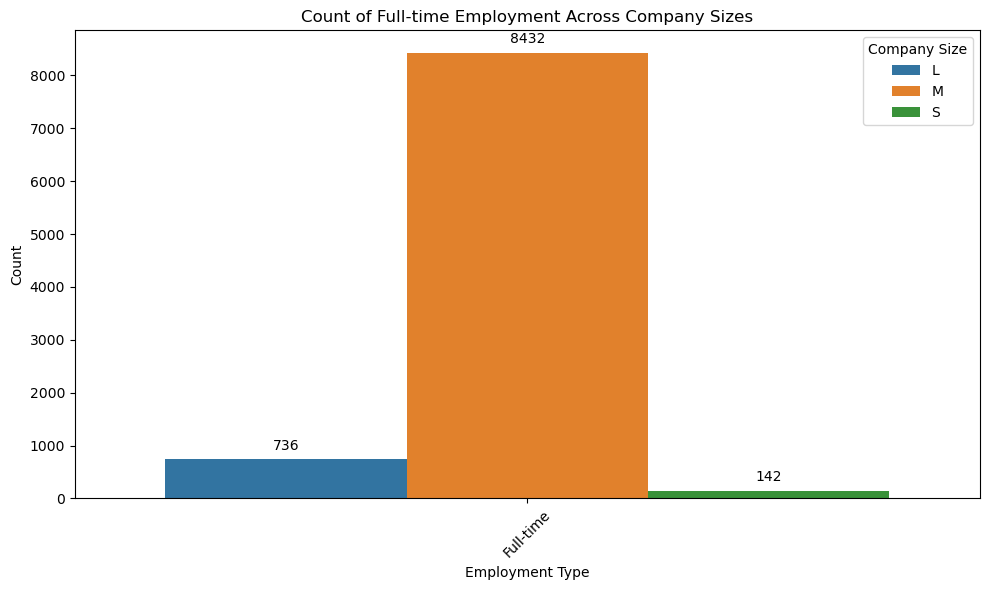

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Full-time employment
full_time_df = clean_df[clean_df['Employment Type'] == 'Full-time']

# Create a count plot to compare Full-time employment and Company Size
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=full_time_df, x='Employment Type', hue='Company Size')
plt.title('Count of Full-time Employment Across Company Sizes')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Company Size')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


Part-time Positions

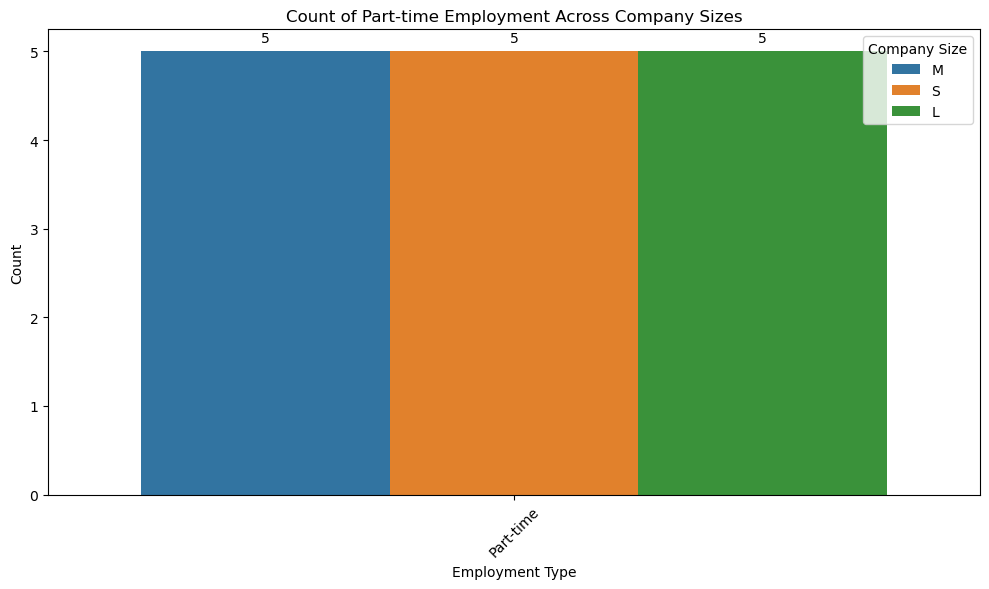

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Part-time employment
part_time_df = clean_df[clean_df['Employment Type'] == 'Part-time']

# Create a count plot to compare Part-time employment and Company Size
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=part_time_df, x='Employment Type', hue='Company Size')
plt.title('Count of Part-time Employment Across Company Sizes')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Company Size')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
Contract Positions

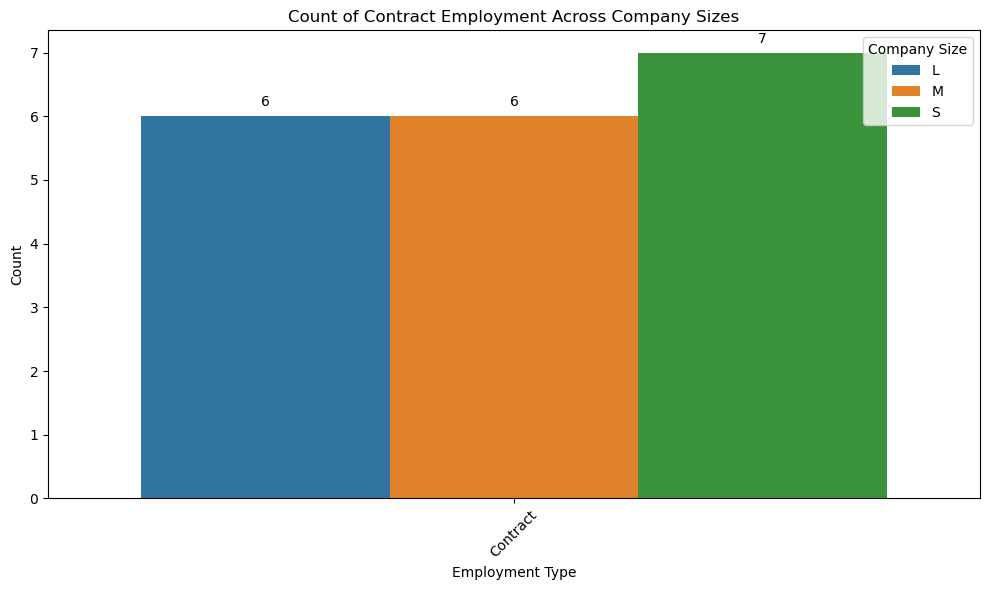

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Contract employment
contract_df = clean_df[clean_df['Employment Type'] == 'Contract']

# Create a count plot to compare Contract employment and Company Size
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=contract_df, x='Employment Type', hue='Company Size')
plt.title('Count of Contract Employment Across Company Sizes')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Company Size')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


Freelance Positions

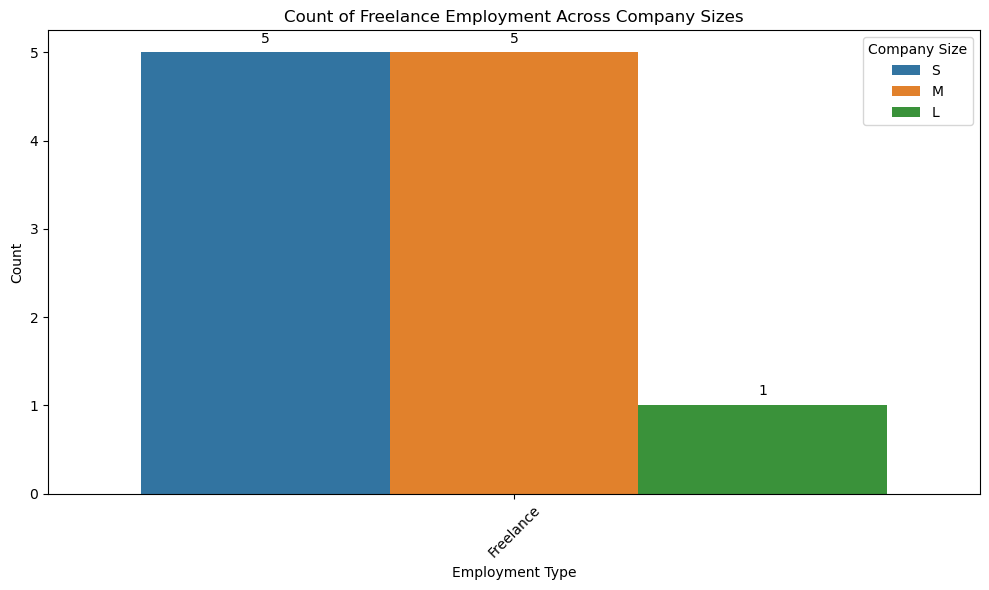

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned DataFrame
clean_df = pd.read_csv('Jobs in Data.csv')

# Filter the DataFrame for Freelance employment
freelance_df = clean_df[clean_df['Employment Type'] == 'Freelance']

# Create a count plot to compare Freelance employment and Company Size
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=freelance_df, x='Employment Type', hue='Company Size')
plt.title('Count of Freelance Employment Across Company Sizes')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Company Size')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()
